**Assignment 5**

**Consider a scenario where a person visits a supermarket for shopping. S/He purchases various items in different sections such as clothing, grocery, utensils. Write an OpenMP program to process the bill parallelly in each section and display the final amount to be paid by the customer.Analyze the time take by sequential and parallel processing.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Processing clothing item...
Processing clothing item...
Processing clothing item...
Processing clothing item...
Processing clothing item...
Processing clothing item...
Processing clothing item...
Processing grocery item...
Processing grocery item...
Processing grocery item...
Processing grocery item...
Processing grocery item...
Processing grocery item...
Processing grocery item...
Processing utensils item...
Processing utensils item...
Processing utensils item...
Processing utensils item...
Processing utensils item...
Processing utensils item...
Processing utensils item...
Total amount to be paid (Sequential): $259.00
Time taken (Sequential): 4.21 seconds

Processing clothing item...
Processing grocery item...
Processing utensils item...
Processing clothing item...
Processing grocery item...
Processing utensils item...
Processing clothing item...Processing grocery item...

Processing utensils item...
Processing grocery item...
Processing clothing item...
Processing utensils item...
Pr

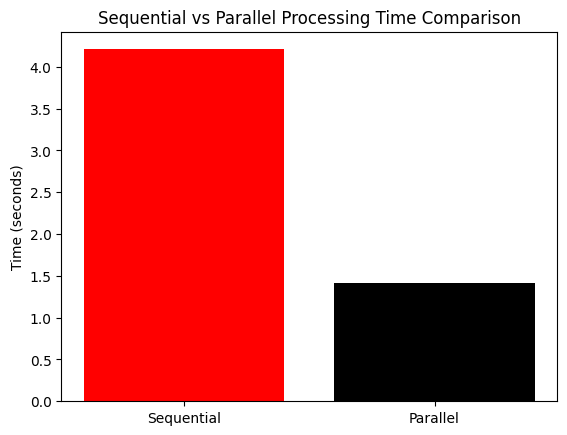

In [4]:
import threading
import time
import matplotlib.pyplot as plt

class ProcessingThread(threading.Thread):
    def __init__(self, processing_function, num_items):
        super().__init__()
        self.processing_function = processing_function
        self.num_items = num_items
        self.results = []

    def run(self):
        for _ in range(self.num_items):
            result = self.processing_function()
            self.results.append(result)

# Function to process bill in the clothing section
def process_clothing():
    print("Processing clothing item...")
    time.sleep(0.2)  # Simulating processing time
    return 22  # Cost of each clothing item

# Function to process bill in the grocery section
def process_grocery():
    print("Processing grocery item...")
    time.sleep(0.2)  # Simulating processing time
    return 10  # Cost of each grocery item

# Function to process bill in the utensils section
def process_utensils():
    print("Processing utensils item...")
    time.sleep(0.2)  # Simulating processing time
    return 5  # Cost of each utensils item

if __name__ == "__main__":
    # Sequential Processing
    start_time = time.time()

    clothing_cost = sum(process_clothing() for _ in range(7))
    grocery_cost = sum(process_grocery() for _ in range(7))
    utensils_cost = sum(process_utensils() for _ in range(7))

    total_cost = clothing_cost + grocery_cost + utensils_cost
    sequential_time = time.time() - start_time
    print(f"Total amount to be paid (Sequential): ${total_cost:.2f}")
    print(f"Time taken (Sequential): {sequential_time:.2f} seconds\n")

    # Parallel Processing
    start_time = time.time()

    # Create threads for parallel processing
    num_items = 7
    threads = [
        ProcessingThread(process_clothing, num_items),
        ProcessingThread(process_grocery, num_items),
        ProcessingThread(process_utensils, num_items)
    ]

    # Start threads
    for thread in threads:
        thread.start()

    # Wait for all threads to finish
    for thread in threads:
        thread.join()

    # Calculate total cost
    total_cost_parallel = sum(sum(thread.results) for thread in threads)
    parallel_time = time.time() - start_time
    print(f"Total amount to be paid (Parallel): ${total_cost_parallel:.2f}")
    print(f"Time taken (Parallel): {parallel_time:.2f} seconds")

    # Plotting
    labels = ['Sequential', 'Parallel']
    times = [sequential_time, parallel_time]

    plt.bar(labels, times, color=['Red', 'Black'])
    plt.ylabel('Time (seconds)')
    plt.title('Sequential vs Parallel Processing Time Comparison')
    plt.show()


According to the graph, parallel processing takes less time than sequential processing since each process runs on a separate thread, but sequential processing takes nearly three times as long.